# Digital Trace Data - Lab 4: Total Error Framework

In this lab, we work with a data donation dataset. Therefore, we make use of the TE framework for data donations, which can be found in the lecture slides of week 4, or in [this](https://www.aup-online.com/content/journals/10.5117/CCR2022.2.002.BOES) paper.

## Part 1: The LISS Data

In in this lab, we will work with data from the LISS panel. The LISS panel is a representative sample in the Netherlands, managed by Centerdata at Tilburg University. It consists of 5,000 households and approximately 7,500 individuals aged 16 and older, recruited through a probability sample from the population register by Statistics Netherlands. You can visit their [website](https://statements.centerdata.nl/liss-panel-data-statement) and explore the various aspects of the panel. This information will be needed to answer the following questions.



### 1.1 What distinguishes the LISS Panel from other online panels according to the website?

*ADD YOUR ANSWER HERE*

### 1.2 What are the potential advantages and disadvantages of the participation method used by the LISS panel compared to self-registration methods used by other panels?

*ADD YOUR ANSWER HERE*

### 1.3 What is the focus of the LISS Core Study, and how often is it conducted?


*ADD YOUR ANSWER HERE*

## Part 2: Working with WhatsApp data from the LISS panel

We will work with a study, in which members from the LISS panel were asked to donate their Whatsapp account data, and data from one Whatsapp group chat. Here, we will explore what kind of errors were introduced during this data collection. We will follow the total error framework in the article by Boeschoten et al. (2022) and will first look into representation and then into measurement. We consider the distribution of number of groups as our outcome of interest. Thus, we are looking into the errors that affect this outcome.

**But before you can start working with the data, you need to [sign this form](https://statements.centerdata.nl/liss-panel-data-statement).**

Please read the terms and conditions carefully.

Now, let's get to work.

In [1]:
# Reading in the data
import pandas as pd

url = "https://raw.githubusercontent.com/digitalTraceData/digitalTraceData.github.io/refs/heads/main/materials/lab4/data_lab4.csv"
data = pd.read_csv(url)



### Codebook

The dataset contains the following variables:

1. **consent**: Willingness to share data (Yes/No)
2. **did_donate_account**: Was data actually donated (Yes/No)
3. **sex**: Respondent's sex (Male, Female, Other)
4. **age**: Respondent's age
5. **education**: Respondent's education level
   - primary education (Primary Education)
   - vmbo (Preparatory Secondary Vocational Education)
   - mbo (Secondary Vocational Education)
   - havo/vwo (Senior General Secondary Education/Pre-University Education)
   - hbo (University of Applied Sciences)
   - wo (University Education)
6. **groups_don**: Number of WhatsApp groups retrieved from donated data
7. **groups_quest**: Number of WhatsApp groups stated in the survey

In addition, the dataset contains all individuals who opened and started with filling in the questionnaire.

### Let us first look at the dimensions of the data set. To do this, we will use the `shape` function that we got to know in week 2.

In [2]:
print(data.shape)

(3598, 7)


### 2.1 How many people started the study?

*ADD YOUR ANSWER HERE*

### 2.2 We know that 4800 people were invited for the study. What percentage of these people do we have data for?

*ADD YOUR ANSWER HERE*

### 2.3 What do you think happened to the other people?





*ADD YOUR ANSWER HERE*

### Next, we can inspect the variable *consent*.

In [3]:
print(data["consent"].value_counts())

consent
no     2669
yes     929
Name: count, dtype: int64


### 2.4 How many people indicated that they were willing to share their WhatsApp data?

*ADD YOUR ANSWER HERE*

### 2.5 What percentage is this of the group that started the study?

*ADD YOUR ANSWER HERE*

### 2.6 What do you think of this percentage? What did you expect?

*ADD YOUR ANSWER HERE*

###2.7 What do you think are reasons why people would not be willing to participate in data donation of WhatsApp data?

*ADD YOUR ANSWER HERE*

### 2.8 What percentage is this (the number you obtained under question 2.4) of the original sample?

*ADD YOUR ANSWER HERE*

### Now, let's have a look at the variable *did_donate_account*.

In [4]:
print(data["did_donate_account"].value_counts())

did_donate_account
No     3249
Yes     349
Name: count, dtype: int64


### 2.9 How many people in the end donated their WhatsApp account data?


*ADD YOUR ANSWER HERE*

### 2.10 What percentage is this of the group that said that they were willing to donate?


*ADD YOUR ANSWER HERE*

### 2.11 What do you think of this percentage? What did you expect?

*ADD YOUR ANSWER HERE*

### 2.12 What can be reasons why people indicated that they were willing to participate in data donation initially, but in the end they did not do it?

*ADD YOUR ANSWER HERE*

### 2.13 What percentage is this (the number you obtained under question 2.9) of the original sample?

*ADD YOUR ANSWER HERE*

Now we have insight in the subsequent steps were representation error was induced, we can make a plot:

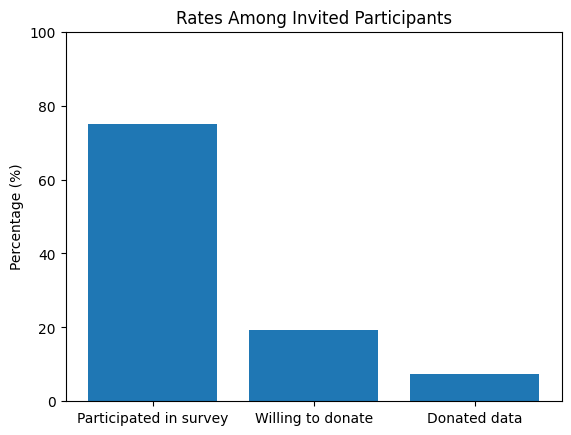

In [5]:
import matplotlib.pyplot as plt

# Data for plotting
percentages = [
    (len(data) / 4800) * 100,
    (data["consent"].value_counts().get("yes", 0) / 4800) * 100,
    (data["did_donate_account"].value_counts().get("Yes", 0) / 4800)*100
]

labels = [
    "Participated in survey",
    "Willing to donate",
    "Donated data"
]

# Create bar plot
plt.bar(labels, percentages)
plt.ylabel("Percentage (%)")
plt.title("Rates Among Invited Participants")
plt.ylim(0, 100)
plt.show()


### 2.14 Look at the figure that we just created and consider having donated data as the goal. What would you then define as the nonresponse?

*ADD YOUR ANSWER HERE*

### 2.15 Again look at the same figure. Where can we find the compliance error and the consent error?

*ADD YOUR ANSWER HERE*

### 2.16 Why can't we distinguish between compliance and consent in the figure?

*ADD YOUR ANSWER HERE*

### 2.17 Can you think of one other issues that might have induced representation error that was not part of this exercise? How do you this error had affected the final number of data donations?

*ADD YOUR ANSWER HERE*

### 2.18 If you consider the "Number of WhatsApp groups" to be an indication of someone's true social network size, how do you think this might differ between WhatsApp users and non-WhatsApp users?

*ADD YOUR ANSWER HERE*

## Part 3: Representation with respect to demographic characteristics

For us to understand whether it is problematic that only a small proportion of the people that were invited made it to the donation step, we need to inspect how the group of people who donated differs from the group that did not donate.

To do this, we are going to look into some background characteristics.
Specifically, we will inspect sex, age and level of education. We start with the variable "Sex".

We first look how the distribution of "Sex" looks like in the complete dataset.

In [6]:
print(data["sex"].value_counts())

sex
female    1878
male      1716
other        4
Name: count, dtype: int64


### 3.1. What do you think of this distrubtion? How does it compare to the Dutch population (which you can find on the website of CBS)?

*ADD YOUR ANSWER HERE*

We now explore how the distrubtion of "Sex" differs between the group of people who donated their WhatsApp data and the group who did not. We do this by first cross-tabulating sex by the donation status.

In [7]:
print(pd.crosstab(data["sex"], data["did_donate_account"]))

did_donate_account    No  Yes
sex                          
female              1702  176
male                1544  172
other                  3    1


Next, we can plot it:

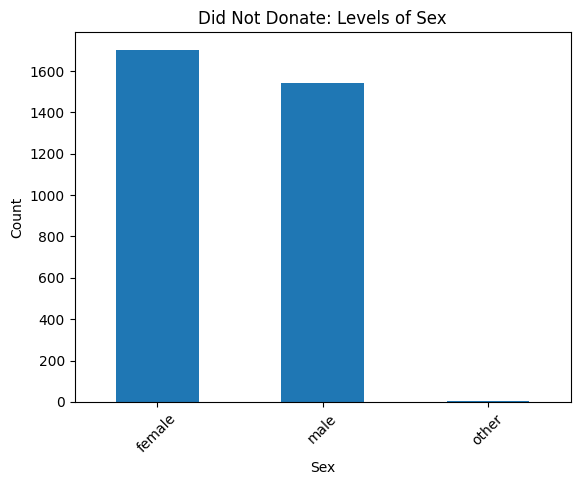

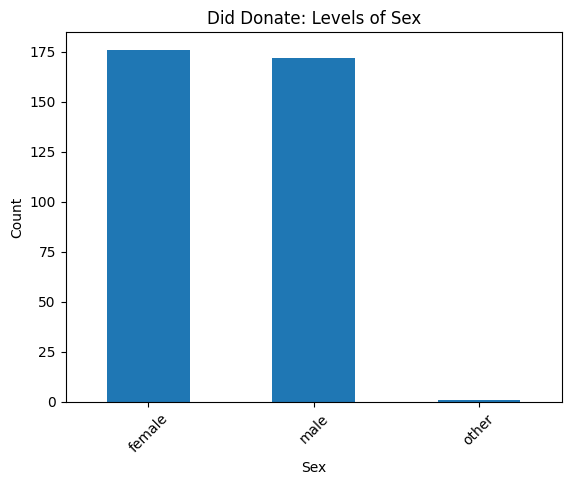

In [8]:
# get sex counts for individuals who did vs. did not donate
sex_counts_nodon = data["sex"][data["did_donate_account"] == "No"].value_counts()
sex_counts_don = data["sex"][data["did_donate_account"] == "Yes"].value_counts()

# Create Bar Plots
sex_counts_nodon.plot(kind="bar")
plt.title("Did Not Donate: Levels of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

sex_counts_don.plot(kind="bar")
plt.title("Did Donate: Levels of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### 3.2 Is the distribution of "Sex" similar between the group that donated their WhatsApp data and the group who did not donate? If not, in what way are they different?

*ADD YOUR ANSWER HERE*

### 3.3 Can you think of a reason for this difference between donated and not donated with respect to "Sex"?

*ADD YOUR ANSWER HERE*

We now look what the distribution of "Age" looks like in the complete dataset.

In [9]:
print(data["age"].describe())

count    3598.000000
mean       55.332685
std        18.216494
min        16.000000
25%        41.250000
50%        59.000000
75%        70.000000
max        96.000000
Name: age, dtype: float64


<Axes: xlabel='age', ylabel='Density'>

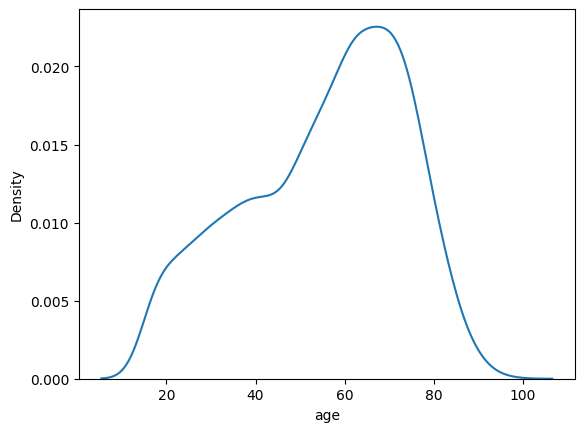

In [10]:
import seaborn as sns
sns.kdeplot(data=data, x="age")

### 3.4. What do you think of this distrubtion? How does it compare to the Dutch population (which you can find on the website of CBS)?

*ADD YOUR ANSWER HERE*

We now explore how the distrubtion of "Age" differs between the group of people who donated their WhatsApp data and the group who did not. We do this by first creating a density plot.

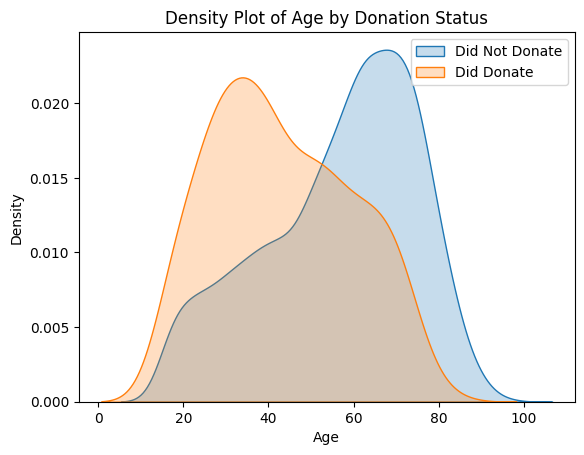

In [11]:
# Density plot for those who did not donate
sns.kdeplot(data["age"][data["did_donate_account"] == "No"], label="Did Not Donate", fill=True)

# Density plot for those who did donate
sns.kdeplot(data["age"][data["did_donate_account"] == "Yes"], label="Did Donate", fill=True)

# Add titles and labels
plt.title("Density Plot of Age by Donation Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

### 3.5 Is the distribution of "Age" similar between the group that donated their WhatsApp data and the group who did not donate? If not, in what way are they different?

*ADD YOUR ANSWER HERE*

### 3.6 Can you think of a reason for this difference between donated and not donated with respect to "Age"?

*ADD YOUR ANSWER HERE*

Now, let's also look into the variable "Education". We first look what the distribtuion of "Education looks like in the complete dataset.

In [12]:
print(data["education"].value_counts())

education
hbo                  983
mbo                  873
vmbo                 630
wo                   507
havo/vwo             359
primary education    235
Name: count, dtype: int64


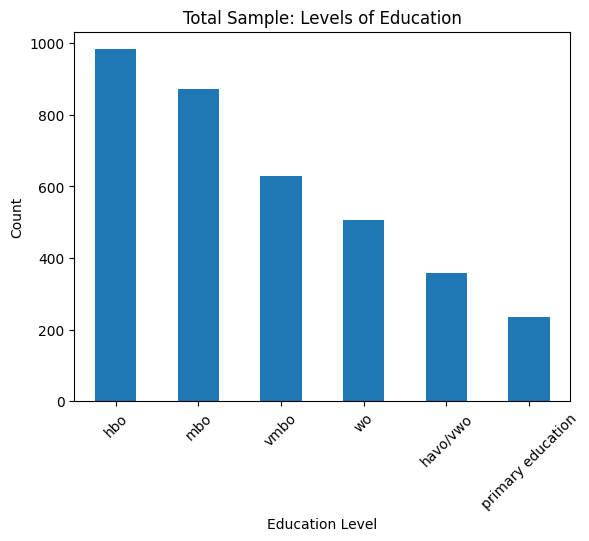

In [13]:
data["education"].value_counts().plot(kind="bar")
plt.title("Total Sample: Levels of Education")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### 3.7. What do you think of this distrubtion? How does it compare to the Dutch population (which you can find on the website of CBS)?

*ADD YOUR ANSWER HERE*

We now explore how the distrubtion of "Education" differs between the group of people who donated their WhatsApp data and the group who did not. We do this by first creating two histograms.

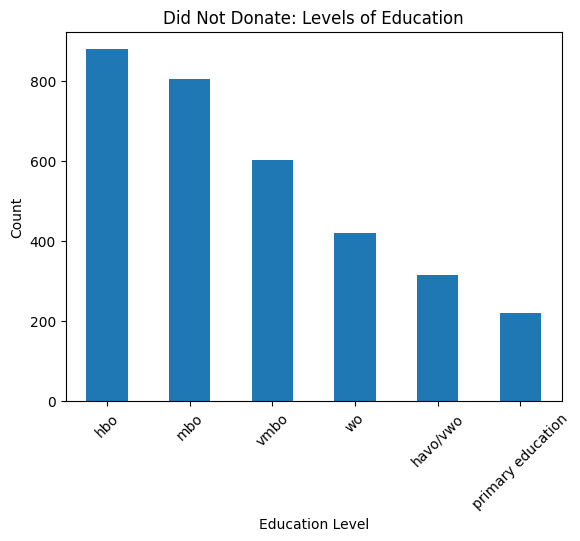

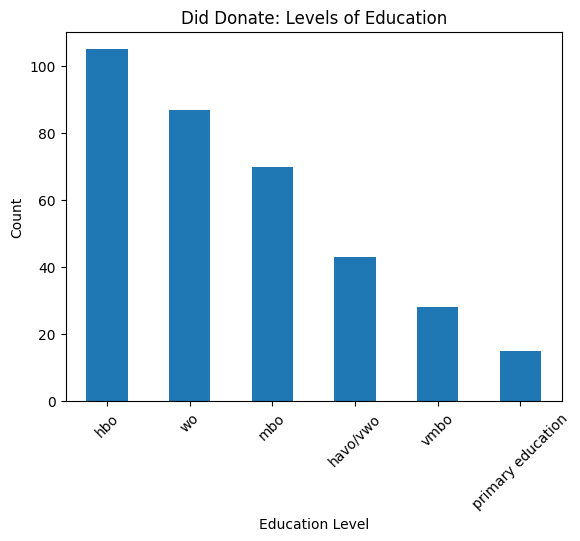

In [14]:
# get education counts for individuals who did vs. did not donate
education_counts_nodon = data["education"][data["did_donate_account"] == "No"].value_counts()
education_counts_don = data["education"][data["did_donate_account"] == "Yes"].value_counts()

# Create Bar Plots for both
education_counts_nodon.plot(kind="bar")
plt.title("Did Not Donate: Levels of Education")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

education_counts_don.plot(kind="bar")
plt.title("Did Donate: Levels of Education")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### 3.8 Is the distribution of "Education" similar between the group that donated their WhatsApp data and the group who did not donate? If not, in what way are they different?

*ADD YOUR ANSWER HERE*

### 3.9 Can you think of a reason for this difference between donated and not donated with respect to "Education"?

*ADD YOUR ANSWER HERE*

## Part 4: Measurement Error

Now, let's focus on measurement errors, particularly construct invalidity and measurement error. Note that by following the TE framework, you see that there are other types of errors, but with the data we have, we can't separate measurement error from these other types.

Given these constraints, we will be concentrating on validity and measurement error.

Validity tells us to what extent we are actually measuring what we want to measure. Measurement error tells ut to what extent the measurements we obtain are correct. We focus on the number of Whatsapp group respondents are member of.


## 4.1 Why are we not able to separate validity and measurement error when measuring "The number of WhatsApp groups" a respondent is a member of?

*ADD YOUR ANSWER HERE*

We now explore how the distribution of donated number of groups compares to the distribution of self-reported number of groups.

count    2831.00000
mean       10.45461
std        17.44062
min         0.00000
25%         3.00000
50%         6.00000
75%        10.00000
max       400.00000
Name: groups_quest, dtype: float64


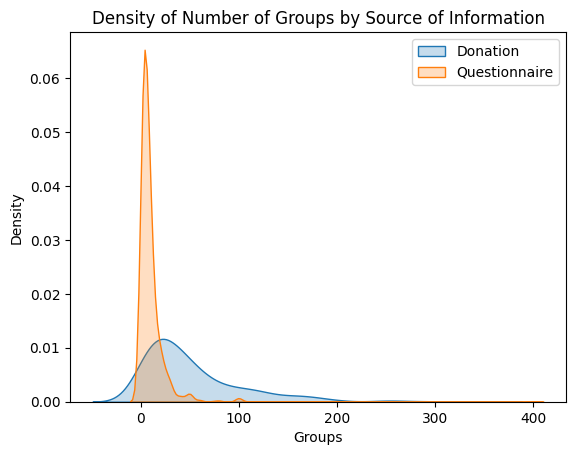

In [15]:
print(data["groups_quest"].describe())

# Plot
sns.kdeplot(data["groups_don"], label = "Donation", fill = True)
sns.kdeplot(data["groups_quest"], label = "Questionnaire", fill = True)

# Add titles and labels
plt.title("Density of Number of Groups by Source of Information")
plt.xlabel("Groups")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

### 4.2 How does the distribution of the donated number of groups differ from the self-reported number of groups?

*ADD YOUR ANSWER HERE*

### 4.3 What can be reasons for the differences between these two distributions?

*ADD YOUR ANSWER HERE*

If there were no differences between the donated numbers and self report numbers, there would be correlation of 1 between the variables, let's have a look:

0.5421788780261098


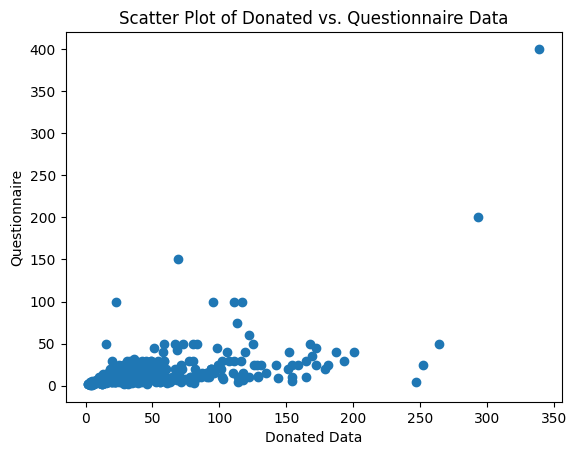

In [16]:
# Correlation
correlation = data[["groups_don", "groups_quest"]].dropna().corr().iloc[0, 1]
print(correlation)

# Plot
plt.scatter(data["groups_don"], data["groups_quest"])
plt.xlabel("Donated Data")
plt.ylabel("Questionnaire")
plt.title("Scatter Plot of Donated vs. Questionnaire Data")
plt.show()

### 4.4 What is the correlation coefficient between the two variables?

*ADD YOUR ANSWER HERE*

### 4.5 How would you interpret this correlation?

*ADD YOUR ANSWER HERE*

### 4.6 We are not able to further inspect the other types of errors that are on the measurement side of the TE framework by Boeschoten. What are the types of errors we did not inspect?

*ADD YOUR ANSWER HERE*

### 4.7 Explain what extraction error is and how this might be present in our donated data?

*ADD YOUR ANSWER HERE*

### 4.8 Explain what algorithmic error is and how this might be present in our donated data?

*ADD YOUR ANSWER HERE*

### 4.9 Explain what integration error is and how this might be present in our donated data?

*ADD YOUR ANSWER HERE*

## Part 5: Reading Questions

When answering these questions, consider the Introduction and Chapter 1 from the book "Data Feminism".

In 2022, a researcher conducted a data donation study in the Centerpanel. She asked the members of the Centerpanel to request a digital copy of their Google Semantic Location History data through the Google Takeout option.

This is a very small piece of how the raw data in this DDP looks like:






<div>
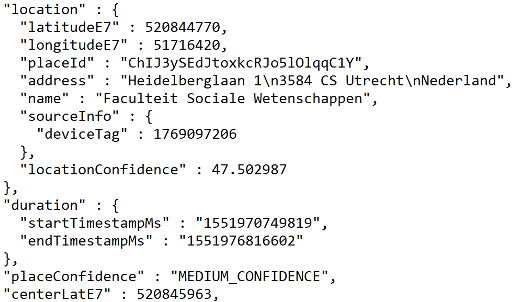
</div>

### 5.1 Can you explain what information you are seeing here?

*ADD YOUR ANSWER HERE*

### 5.2	How sensitive would you say this information is and for what reason?

*ADD YOUR ANSWER HERE*

In the local processing step of the data donation study, this data was aggregated in such a way that for every activity the person carried out, it was calculated per month how many kilometers were traveled doing that activity, and for how many hours. Below you see an example for cycling, but there were about 20 potential activities in the data, such as:
-	Walking
-	Running
-	Train
-	Metro
-	Cycling
-	Motorcycling
-	In passenger vehicle.
-	In buss
-	Skiing
-	Ferry
-	…




<div>
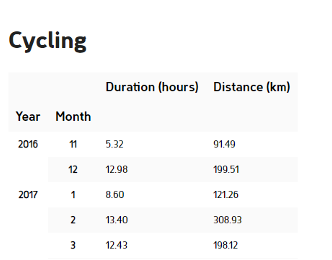
</div>

The researcher used this type of data to detect changes in physical activity due to a COVID-19 lockdown.

### 5.3	To answer the question “Data science by whom”, we need to identify the different actors that have influenced  the data that in the end was collected for that study. Who were these actors?

*ADD YOUR ANSWER HERE*

### 5.4 Every actor can have a different purpose when collecting or processing data. Answer the question “Data science for whom?” for every actor separately.

*ADD YOUR ANSWER HERE*

To answer the question “Data science with whose interest and goals” we answer the following subquestions again separately for each actor.

### 5.5	Whose goals are prioritized in data science (and whose are not)?

*ADD YOUR ANSWER HERE*

### 5.6	What goals and purposes are going underserved?

*ADD YOUR ANSWER HERE*

### 5.7 Who is in charge of the institutions?

*ADD YOUR ANSWER HERE*

### 5.8	Who benefits the most from the status quo?

*ADD YOUR ANSWER HERE*